## Video processing

In [1]:
import cv2

In [2]:
import cv2
capture=cv2.VideoCapture(0)
width=int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)) # to capture the width of the video image ex: 720.0
height=int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)) # to capture the height of the video image


In [11]:
while True:
    ret,frame=capture.read()
    #gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('Frame',frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
capture.release()

cv2.destroyAllWindows()

In [3]:
pwd

'C:\\Users\\divakar.kareddy\\Computer Vision'

In [ ]:
import cv2
capture=cv2.VideoCapture(0)
width=int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)) # to capture the width of the video image ex: 720.0
height=int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)) # to capture the height of the video image
frames=int(capture.get(cv2.CAP_PROP_FRAME_FRAME_COUNT))

output=cv2.VideoWriter('myvideo.mp4',cv2.VideoWriter_fourcc(*'DIVX'),frames,(width,height))


while True:
    ret,frame=capture.read()
    #frame1=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #operations
    output.writer(frame)
    cv2.imshow('Frame',frame)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
capture.release()
output.release()
cv2.destroyAllWindows()

In [4]:
import cv2

In [ ]:
capture =cv2.VideoCapture('myvideo.mp4')

In [ ]:
cv2.read()

In [ ]:
if !capture.isOpened():
    print("ERROR in opening video fille")
while capture.isOpened():
    ret,frame=capture.read()
    cv2.imshow(frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
capture.release()
cv2.destroyAllWindows()

# Object detection

### Match Template detection

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [8]:
sammy=cv2.imread('DATA/sammy.jpg')
show_sammy=cv2.cvtColor(sammy,cv2.COLOR_BGR2RGB)

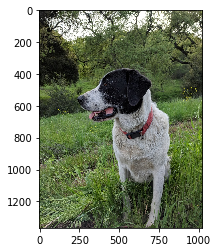

In [9]:
plt.imshow(show_sammy)

In [10]:
face=cv2.imread('DATA/sammy_face.jpg')
face_sammy=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

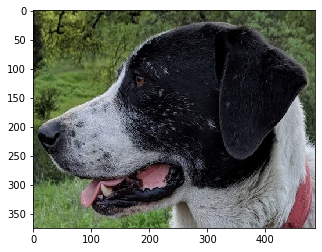

In [11]:
plt.imshow(face_sammy)

In [13]:
res=cv2.matchTemplate(show_sammy,face_sammy,method=cv2.TM_CCOEFF)

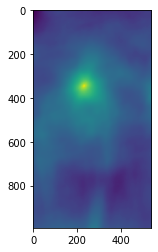

In [14]:
plt.imshow(res)

In [12]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

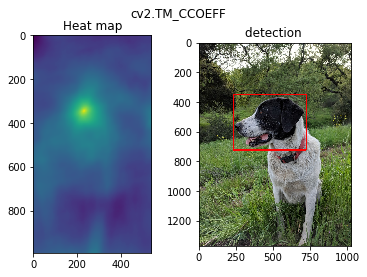

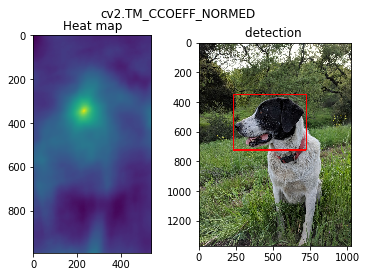

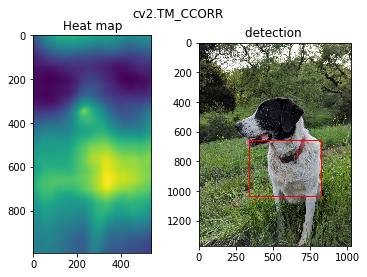

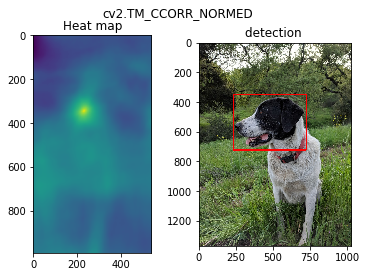

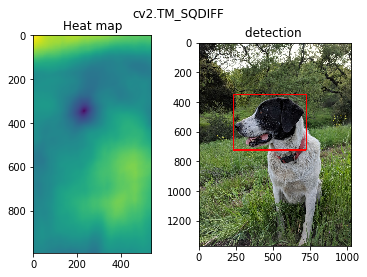

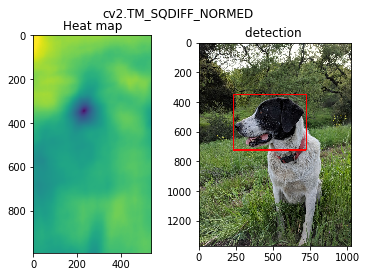

In [30]:

for m in methods:
    sammy=cv2.imread('DATA/sammy.jpg')
    show_sammy=cv2.cvtColor(sammy,cv2.COLOR_BGR2RGB)
    method=eval(m)
    result=cv2.matchTemplate(show_sammy,face_sammy,method=method)
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc#(x,y)
    else:
        top_left=max_loc
    
    height,width,channels=face_sammy.shape
    #print(top_left)
    
    bottom_right=(top_left[0]+width,top_left[1]+height)
    #print(bottom_right)
    rect_image=cv2.rectangle(show_sammy,top_left,bottom_right,color=(255,0,0),thickness=5)
    #subbplot 1
    plt.subplot(121)
    plt.imshow(result)
    plt.title("Heat map")
    #subplot 2
    plt.subplot(122)
    plt.imshow(rect_image)
    plt.title("detection ")
    #super title
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')

# corner/ edge detection

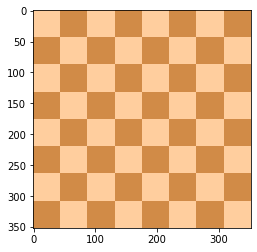

In [252]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
flat_chess1=flat_chess.copy()
plt.imshow(flat_chess)

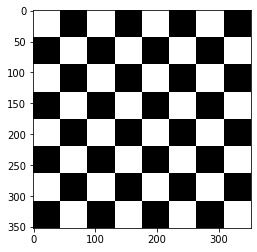

In [253]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

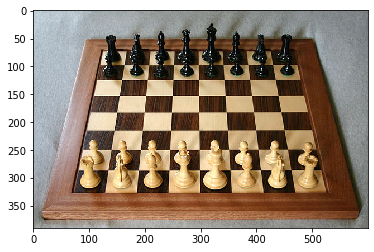

In [254]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

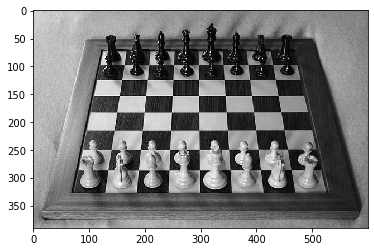

In [255]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [256]:
dst=cv2.cornerHarris(gray_flat_chess,blockSize=5,ksize=5,k=0.04)

In [257]:
flat_chess[dst>0.01*dst.max()]=[255,0,0]

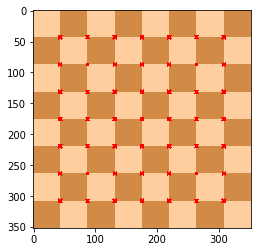

In [258]:
plt.imshow(flat_chess)

## Harris Corner detection

In [259]:
gray_flat_chess_float=np.float32(gray_flat_chess)# to improve accuracy of detection converting int to float

In [260]:
dst1=cv2.cornerHarris(src=gray_flat_chess_float,blockSize=2,ksize=3,k=0.04)

In [261]:
dil_dst=cv2.dilate(dst1,None,iterations=1)

In [262]:
flat_chess1[dil_dst>0.1*dil_dst.max()]=[255,0,0]

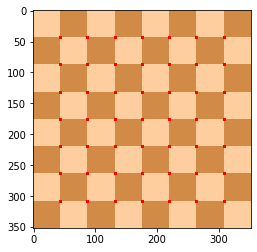

In [263]:
plt.imshow(flat_chess1)

In [264]:
gray_real_chess_float=np.float32(gray_real_chess)

In [265]:
dst2=cv2.cornerHarris(src=gray_real_chess_float,ksize=5,blockSize=2,k=0.08)

In [266]:
dil_dst2=cv2.dilate(dst2,None)#,kernel=np.zeros((5,5),np.uint8)

In [267]:
real_chess[dil_dst2>0.05*dil_dst2.max()]=[255,0,0]

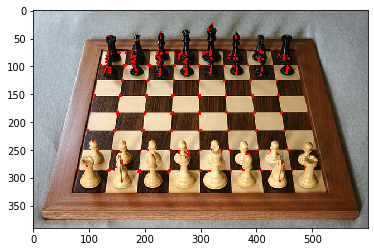

In [268]:
plt.imshow(real_chess)

# Shi-Tomasi Corner Detector (Good Features to Track)

In [271]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

In [276]:
corners=cv2.goodFeaturesToTrack(image=gray_flat_chess,maxCorners=64,qualityLevel=0.01,minDistance=10)#output in floating points

In [279]:
corner_int=np.int0(corners)

In [290]:
for i in corner_int:
    x,y=np.ravel(i)
    cv2.circle(flat_chess,center=(x,y),radius=5,thickness=-1,color=(255,0,0))

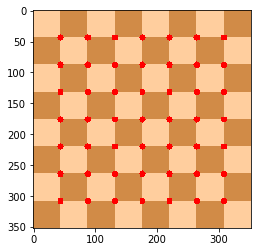

In [291]:
plt.imshow(flat_chess)

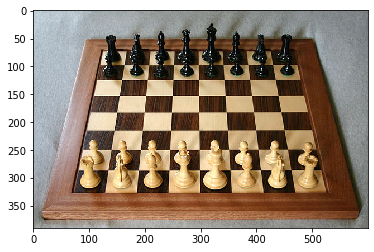

In [306]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

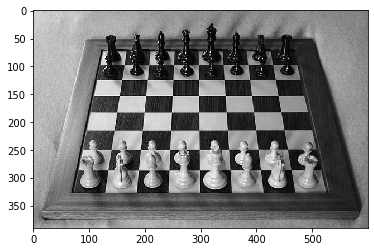

In [307]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [308]:
corners=cv2.goodFeaturesToTrack(image=gray_real_chess,maxCorners=128,qualityLevel=0.01,minDistance=10)#output in floating points

In [309]:
#explicitly we have to draw the circles
for i in corners:
    x,y=np.ravel(i)
    cv2.circle(real_chess,center=(x,y),radius=4,color=(255,0,0),thickness=-1)

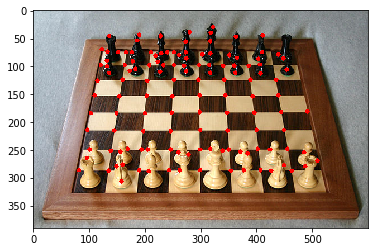

In [310]:
plt.imshow(real_chess)

# Edge detection Canny algo

In [312]:
face=cv2.imread('DATA/sammy_face.jpg')
face_sammy=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

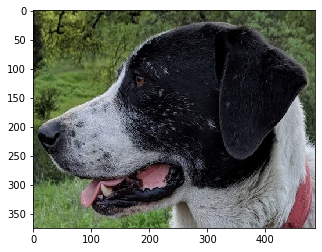

In [313]:
plt.imshow(face_sammy)

In [314]:
edges= cv2.Canny(face_sammy,threshold1=100,threshold2=255) #

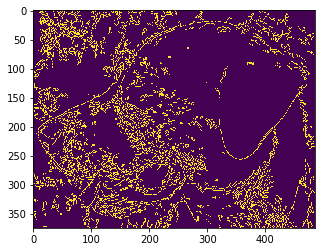

In [315]:
plt.imshow(edges)

In [316]:
# since it is detecting noise lets reduce the noise using blurring technique

In [321]:
blurring=cv2.blur(face_sammy,ksize=(5,5))

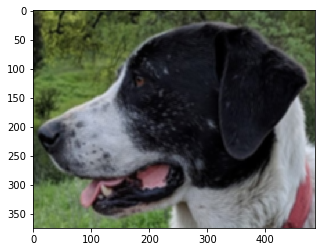

In [322]:
plt.imshow(blurring)

In [327]:
edges1= cv2.Canny(blurring,threshold1=10,threshold2=200) #

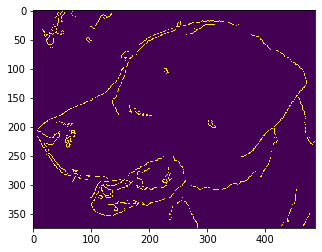

In [328]:
plt.imshow(edges1)

In [329]:
#recommened values for threshold
#med_val=np.median(img)
#threshold1=int(max(0,0.7*med_val))
#threshold2=int(min(255,1.3*med_val))

In [336]:
med_val=np.median(face_sammy)
threshold1=int(max(0,0.7*med_val))
threshold2=int(min(255,1.3*med_val))
print(threshold1)
print(threshold2)

44
83


In [347]:
edges2= cv2.Canny(blurring,threshold1=threshold1,threshold2=threshold2+80) #

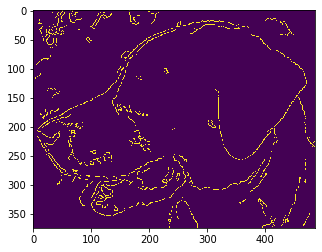

In [348]:
plt.imshow(edges2)

## Grid Detection

 - Find chess kind of patterns using finchessboard and circle patterns

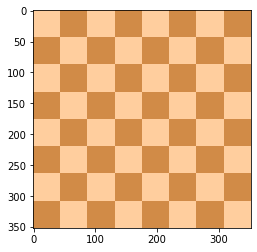

In [355]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
flat_chess1=flat_chess.copy()
plt.imshow(flat_chess)

In [361]:
cv2.findChessboardCorners(flat_chess,patternSize=(8,8))  ## return found or not and values where it found the pattern

(False, None)

In [364]:
found,res=cv2.findChessboardCorners(flat_chess,patternSize=(7,7))  ## return found or not and values where it found the pattern

In [368]:
if found!=None:
    cv2.drawChessboardCorners(image=flat_chess,patternSize=(7,7),corners=res,patternWasFound=found)

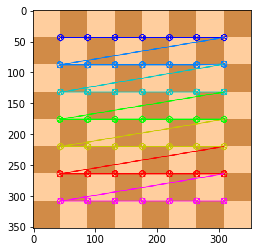

In [369]:
plt.imshow(flat_chess)

In [370]:
dots=cv2.imread('DATA/dot_grid.png')

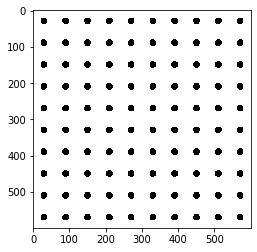

In [371]:
plt.imshow(dots)

In [374]:
found,result=cv2.findCirclesGrid(image=dots,patternSize=(10,10),flags=cv2.CALIB_CB_SYMMETRIC_GRID)

In [376]:
if found!=None:
    cv2.drawChessboardCorners(image=dots,patternSize=(10,10),corners=result,patternWasFound=found)

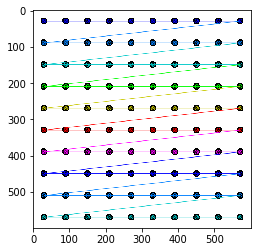

In [377]:
plt.imshow(dots)

In [378]:
## Finding Contours

In [387]:
image=cv2.imread('DATA/internal_external.png',0)

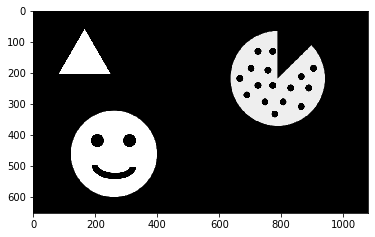

In [389]:
plt.imshow(image,cmap='gray')

In [404]:
#RETR_CCOMP gives external and internal contours RETR_EXTERNAL gives only external contours
contours,hierarchy=cv2.findContours(image=image,method=cv2.CHAIN_APPROX_SIMPLE,mode=cv2.RETR_CCOMP) #have to apply on gray images

In [405]:
type(contours)

list

In [406]:
type(hierarchy)

numpy.ndarray

In [407]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [408]:
hierarchy.shape

(1, 22, 4)

In [409]:
#creating a black image
blck_external=np.zeros(shape=image.shape)

In [412]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(image=blck_external,contours=contours,contourIdx=i,color=255,thickness=-1)    
    

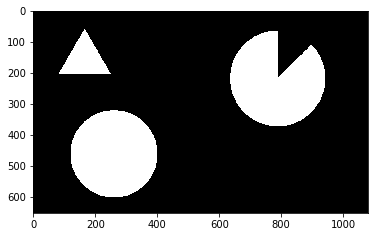

In [414]:
plt.imshow(blck_external,cmap='gray')

In [415]:
#creating a black image
internal=np.zeros(shape=image.shape)

In [420]:
for i in range(len(contours)):
    #external contours
    if hierarchy[0][i][3]!=-1:
        cv2.drawContours(image=internal,contours=contours,contourIdx=i,color=(255,255,255),thickness=-1)

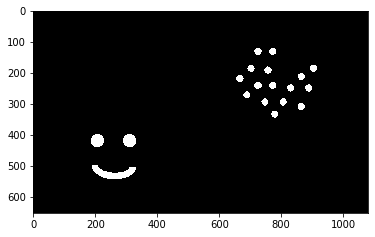

In [421]:
plt.imshow(internal,cmap='gray')

In [427]:
#note
#creating a black image
blck_external=np.zeros(shape=image.shape)

In [428]:
for i in range(len(contours)):
    #external contours
    if hierarchy[0][i][3]==4:
        cv2.drawContours(image=blck_external,contours=contours,contourIdx=i,color=(255,255,255),thickness=-1)

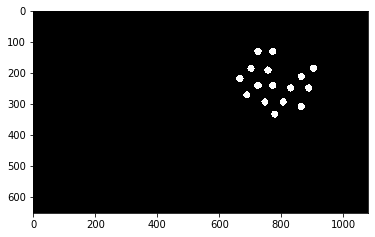

In [430]:
plt.imshow(blck_external,cmap='gray')

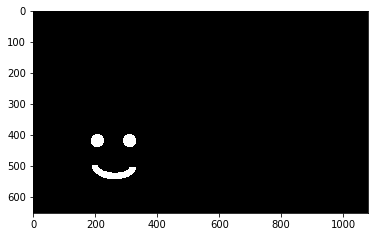

In [431]:
#creating a black image
blck_external=np.zeros(shape=image.shape)
for i in range(len(contours)):
    #external contours
    if hierarchy[0][i][3]==0:
        cv2.drawContours(image=blck_external,contours=contours,contourIdx=i,color=(255,255,255),thickness=-1)
plt.imshow(blck_external,cmap='gray')